# <center> Employee Attrition </center>

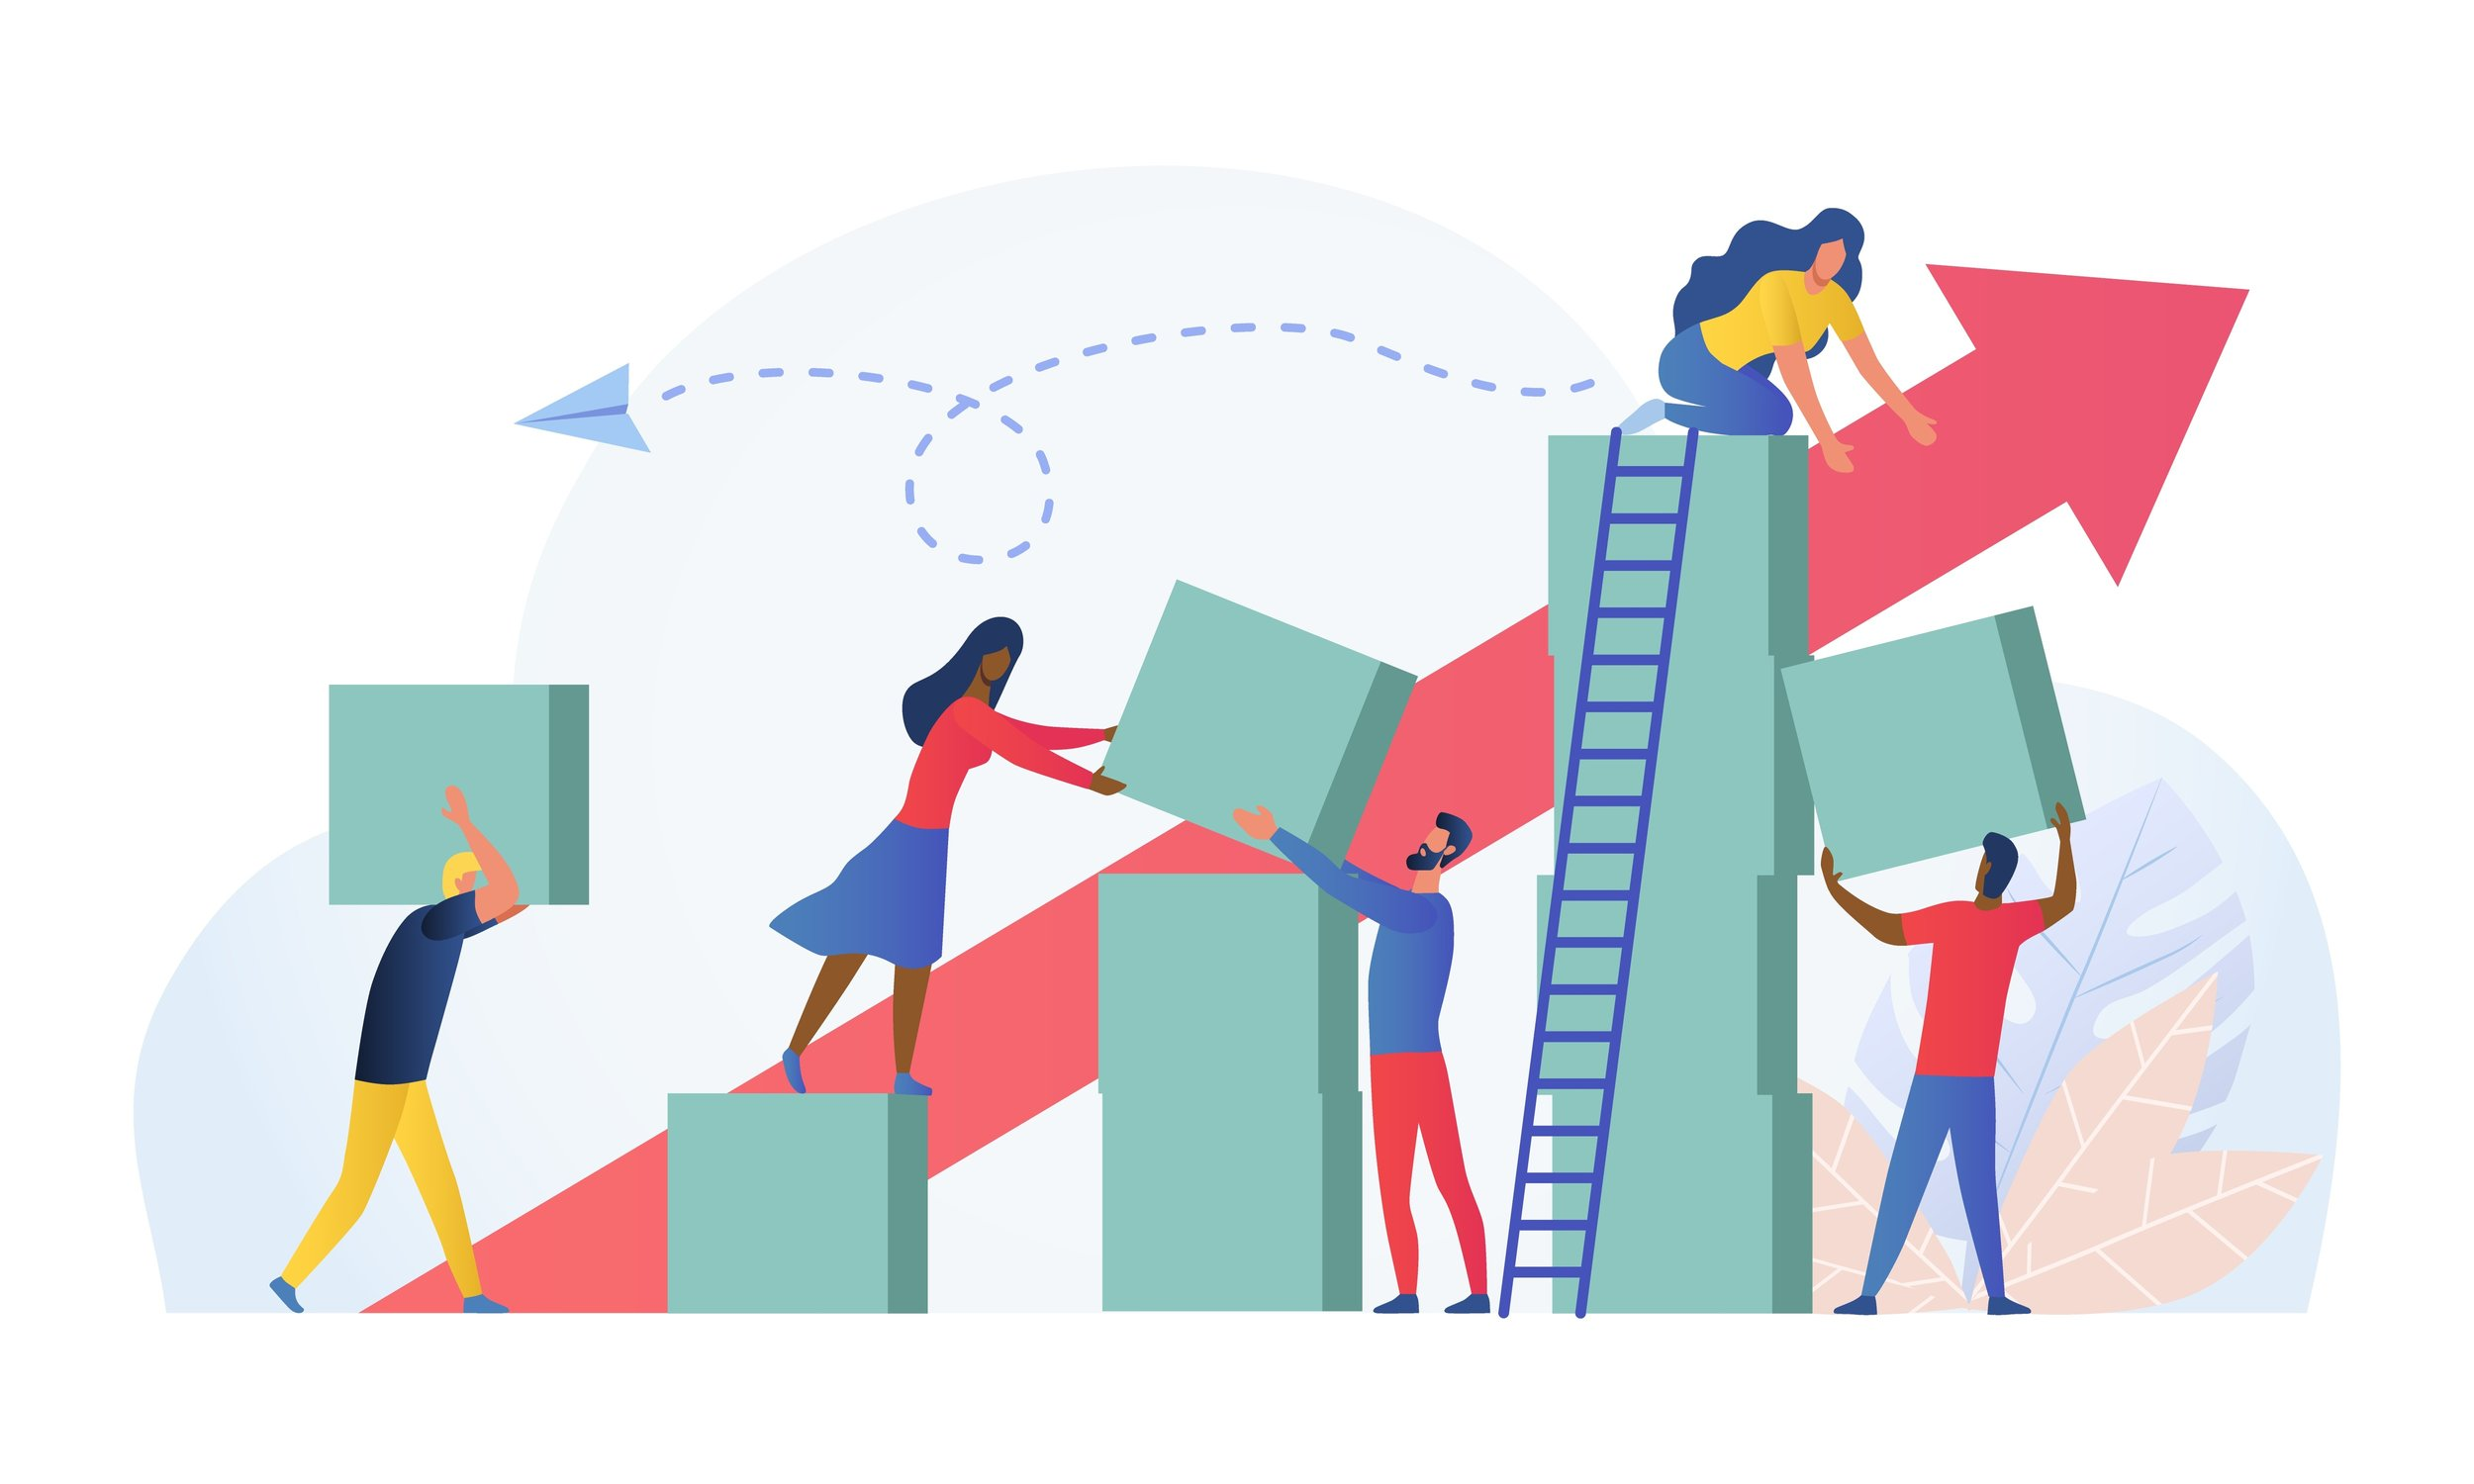

In [3]:
from IPython.display import Image
Image(filename=r'emp.jpeg')


In [4]:
# Importing libraries
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, xgboost as XGB, matplotlib.pyplot as plt,plotly.graph_objects as go, math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
# Plot Customization
plt.figure(figsize = (15,9))
plt.style.context('bmh')

<Figure size 1080x648 with 0 Axes>

In [54]:
# Loading dataset
df = pd.read_csv('../input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [55]:
# Information on dataset
print(f'The dataset has {df.shape[0]} rows for each employee and {df.shape[1]} attributes\n')
print('='*80)
print('The attributes and their unique values are as below\n')
for i in df.columns:
    print(f'======== {i} ========\n')
    print(df[i].value_counts().sort_values(ascending=False))
    print('- - ' * 20)

The dataset has 1470 rows for each employee and 35 attributes

The attributes and their unique values are as below

======== Age ========

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== Attrition ========

No     1233
Yes     237
Name: Attrition, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== BusinessTravel ========

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [56]:
# Dropping columns with little to no useful information
df = df.drop(['EmployeeCount',
                 'EmployeeNumber',
                 'Over18',
                  'StandardHours'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [57]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [58]:
# Unencoding Categorical Features
col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df['Education']:
    df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
                       inplace = True)
    
for i in df['PerformanceRating']:
    df['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
                                  inplace = True)
    
for i in df['WorkLifeBalance']:
    df['WorkLifeBalance'].replace({1: 'Bad', 2:'Good', 3:'Better', 4:'Best'}, 
                                  inplace = True)

for i in df[col]:
    df[i].replace({1:'Low', 2:'Medium',3:'High', 4:'Very High'},
                   inplace = True)

In [59]:
# Checking new values for decoded attributes 
decoded = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction',
           'Education', 'PerformanceRating', 'WorkLifeBalance']

for i in df[decoded]:
    print(f'======== {i} ========\n')
    print(df[i].value_counts().sort_values(ascending=False))
    print('- - ' * 20)

======== EnvironmentSatisfaction ========

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== JobInvolvement ========

High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== JobSatisfaction ========

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== RelationshipSatisfaction ========

High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== Education ========

Bachelor         572
Master           398
College          

In [60]:
# Checking for missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [62]:
Attrition = d[i]f.query("Attrition == 'Yes'")
Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,High,Male,...,Excellent,Medium,0,6,4,Better,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,High,Male,...,Outstanding,Medium,0,10,4,Better,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,Medium,Male,...,Excellent,High,0,8,2,Better,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,Bachelor,Marketing,Very High,Male,...,Excellent,Low,1,1,3,Good,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Master,Medical,Low,Male,...,Excellent,Medium,3,4,3,Best,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,College,Technical Degree,Very High,Male,...,Excellent,Very High,1,14,4,Bad,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,Master,Life Sciences,Medium,Male,...,Excellent,Very High,2,12,3,Better,6,3,0,1


In [12]:
print(f"{Attrition.shape[0]} emplyees in the dataset left the company.\n")
print("Let's try to find some more information about them!")

237 emplyees in the dataset left the company.

Let's try to find some more information about them!


In [23]:
# Creating a function to plot histograms on numeric features
def numeric_plot(i):
    fig = px.histogram(Attrition, x = Attrition[i], nbins  = 20, template = 'plotly_dark',
                      title = f'Attrition x {i}')
    fig.show()

In [24]:
def barplot(i):
    fig = px.histogram(Attrition, x = Attrition[i], template = 'plotly_dark',
                      title = f'Attrition x {i}', text_auto = 'd3-format')
    fig.show()

X = df.drop('Attrition', axis = 1)
y = df.Attrition

In [18]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  1029
X test size:  441
y train size:  1029
y test size:  441


In [19]:
# Enoding categorical variables with Ordinal Encoder
OE = OrdinalEncoder()
columns_OE = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
             'JobSatisfaction','WorkLifeBalance','PerformanceRating','RelationshipSatisfaction']
X_train[columns_OE] = OE.fit_transform(X_train[columns_OE])
X_test[columns_OE] = OE.transform(X_test[columns_OE])
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1049,30,2.0,1358,Sales,16,1.0,Life Sciences,3.0,Male,96,...,0.0,0.0,2,4,2,3.0,2,1,2,2
817,36,0.0,217,Research & Development,18,4.0,Life Sciences,1.0,Male,78,...,1.0,1.0,0,18,0,2.0,11,9,0,9
599,36,2.0,1041,Human Resources,13,0.0,Human Resources,0.0,Male,36,...,0.0,2.0,1,8,2,2.0,5,2,0,4
551,39,2.0,141,Human Resources,3,0.0,Human Resources,0.0,Female,44,...,0.0,0.0,1,12,3,0.0,8,3,3,6
748,26,0.0,265,Sales,29,2.0,Medical,2.0,Male,79,...,0.0,3.0,0,7,6,2.0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,37,2.0,1189,Sales,3,0.0,Life Sciences,0.0,Male,87,...,0.0,1.0,0,12,3,2.0,5,3,1,3
137,39,2.0,1329,Sales,4,4.0,Life Sciences,3.0,Female,47,...,0.0,0.0,1,17,1,1.0,15,11,5,9
846,35,2.0,819,Research & Development,2,0.0,Life Sciences,0.0,Male,44,...,0.0,2.0,1,15,2,1.0,7,7,6,4
92,30,2.0,1334,Sales,4,2.0,Medical,0.0,Female,63,...,0.0,2.0,3,11,4,3.0,11,8,2,7


In [20]:
# Transforming bicategoric variables into binary values
X_train['OverTime'].replace({'Yes': 1,
                                      'No':0}, inplace=True)
X_test['OverTime'].replace({'Yes': 1,
                                      'No':0}, inplace=True)
X_train['Gender'].replace({'Male': 1,
                                      'Female':0}, inplace=True)
X_test['Gender'].replace({'Male': 1,
                                      'Female':0}, inplace=True)

In [21]:
X_train.OverTime.value_counts()

0    724
1    305
Name: OverTime, dtype: int64

In [22]:
X_test.Gender.value_counts()

1    261
0    180
Name: Gender, dtype: int64

In [23]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1049,30,2.0,1358,Sales,16,1.0,Life Sciences,3.0,1,96,...,0.0,0.0,2,4,2,3.0,2,1,2,2
817,36,0.0,217,Research & Development,18,4.0,Life Sciences,1.0,1,78,...,1.0,1.0,0,18,0,2.0,11,9,0,9
599,36,2.0,1041,Human Resources,13,0.0,Human Resources,0.0,1,36,...,0.0,2.0,1,8,2,2.0,5,2,0,4
551,39,2.0,141,Human Resources,3,0.0,Human Resources,0.0,0,44,...,0.0,0.0,1,12,3,0.0,8,3,3,6
748,26,0.0,265,Sales,29,2.0,Medical,2.0,1,79,...,0.0,3.0,0,7,6,2.0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,37,2.0,1189,Sales,3,0.0,Life Sciences,0.0,1,87,...,0.0,1.0,0,12,3,2.0,5,3,1,3
137,39,2.0,1329,Sales,4,4.0,Life Sciences,3.0,0,47,...,0.0,0.0,1,17,1,1.0,15,11,5,9
846,35,2.0,819,Research & Development,2,0.0,Life Sciences,0.0,1,44,...,0.0,2.0,1,15,2,1.0,7,7,6,4
92,30,2.0,1334,Sales,4,2.0,Medical,0.0,0,63,...,0.0,2.0,3,11,4,3.0,11,8,2,7


In [24]:
# Enoding categorical variables with One Hot Encoder
OHE = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
columns_OHE = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
X_train_cols = pd.DataFrame(OHE.fit_transform(X_train[columns_OHE]))
X_test_cols = pd.DataFrame(OHE.transform(X_test[columns_OHE]))
# Putting index back
X_train_cols.index = X_train.index
X_test_cols.index = X_test.index
# Removing categorical columns
num_X_train = X_train.drop([col for col in X_train.columns if X_train[col].dtype == "object"], axis = 1)
num_X_test = X_test.drop([col for col in X_test.columns if X_test[col].dtype == "object"], axis = 1)
# Adding one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train,X_train_cols ],axis = 1)
X_test = pd.concat([num_X_test, X_test_cols], axis = 1)

In [25]:
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,11,12,13,14,15,16,17,18,19,20
1049,30,2.0,1358,16,1.0,3.0,1,96,0.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
817,36,0.0,217,18,4.0,1.0,1,78,0.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
599,36,2.0,1041,13,0.0,0.0,1,36,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
551,39,2.0,141,3,0.0,0.0,0,44,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
748,26,0.0,265,29,2.0,2.0,1,79,1.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,37,2.0,1189,3,0.0,0.0,1,87,0.0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
137,39,2.0,1329,4,4.0,3.0,0,47,2.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
846,35,2.0,819,2,0.0,0.0,1,44,2.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
92,30,2.0,1334,4,2.0,0.0,0,63,2.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
# Rescaling Data
Scaler = MinMaxScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']
X_train[Scaling_Cols] = Scaler.fit_transform(X_train[Scaling_Cols])
X_test[Scaling_Cols] = Scaler.transform(X_test[Scaling_Cols])
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,11,12,13,14,15,16,17,18,19,20
1049,0.285714,2.0,0.898997,0.535714,1.0,3.0,1,0.942857,0.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
817,0.428571,0.0,0.081662,0.607143,4.0,1.0,1,0.685714,0.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
599,0.428571,2.0,0.671920,0.428571,0.0,0.0,1,0.085714,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
551,0.500000,2.0,0.027221,0.071429,0.0,0.0,0,0.200000,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
748,0.190476,0.0,0.116046,1.000000,2.0,2.0,1,0.700000,1.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.452381,2.0,0.777937,0.071429,0.0,0.0,1,0.814286,0.0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
137,0.500000,2.0,0.878223,0.107143,4.0,3.0,0,0.242857,2.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
846,0.404762,2.0,0.512894,0.035714,0.0,0.0,1,0.200000,2.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
92,0.285714,2.0,0.881805,0.107143,2.0,0.0,0,0.471429,2.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [27]:
# Changing y values
print(y_train.value_counts())
print(y_test.value_counts())

No     854
Yes    175
Name: Attrition, dtype: int64
No     379
Yes     62
Name: Attrition, dtype: int64


In [28]:
y_train.replace({'No':0,
                'Yes':1}, inplace = True)
y_test.replace({'No':0,
                'Yes':1}, inplace = True)

In [29]:
print(y_train.value_counts())
print(y_test.value_counts())

0    854
1    175
Name: Attrition, dtype: int64
0    379
1     62
Name: Attrition, dtype: int64


In [30]:
# Dealing with Class Imbalance using SMOTE
from imblearn.over_sampling import SMOTE
X_train,y_train = SMOTE().fit_resample(X_train,y_train)

In [31]:
y_train.value_counts()

0    854
1    854
Name: Attrition, dtype: int64

In [8]:
sns.countplot(df=df, x='Payment')

NameError: name 'df' is not defined

In [32]:
# Importing Models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [33]:
adaboost = AdaBoostClassifier()
randomforest = RandomForestClassifier()
gradientboosting = GradientBoostingClassifier()
decisiontree = DecisionTreeClassifier()
xgboost =  XGBClassifier()

In [34]:
# Creating a function for predictions
def predict(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 73.92%
Precision: 24.27%
Recall: 40.32%
F1_Score: 30.30%


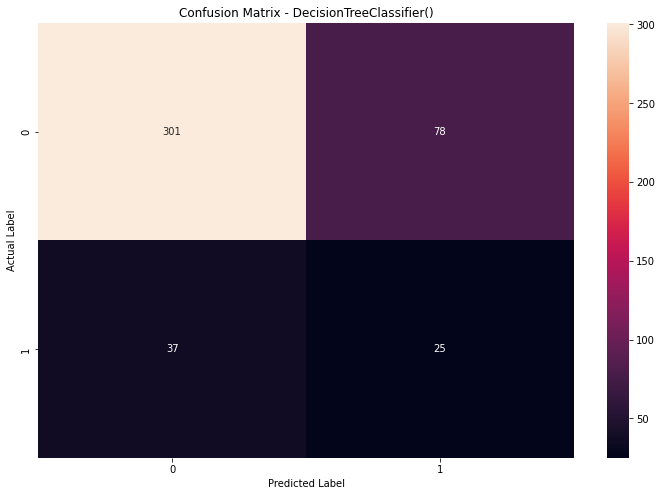

In [35]:
# Decision Tree
predict(decisiontree)

#### Ensemble Methods

Accuracy: 85.03%
Precision: 44.12%
Recall: 24.19%
F1_Score: 31.25%


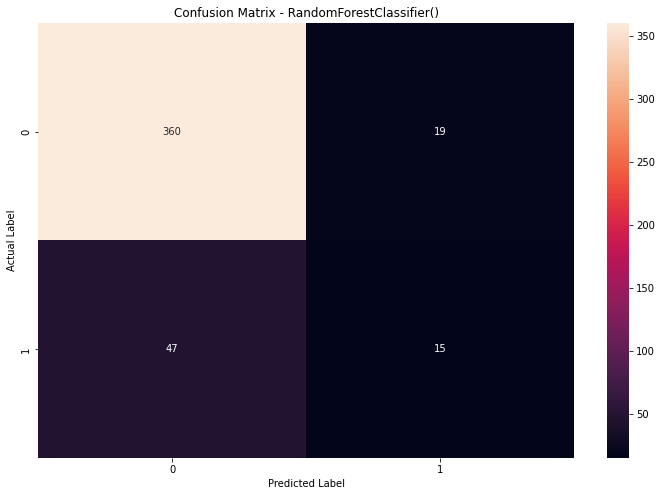

In [36]:
predict(randomforest)

Accuracy: 84.58%
Precision: 46.05%
Recall: 56.45%
F1_Score: 50.72%


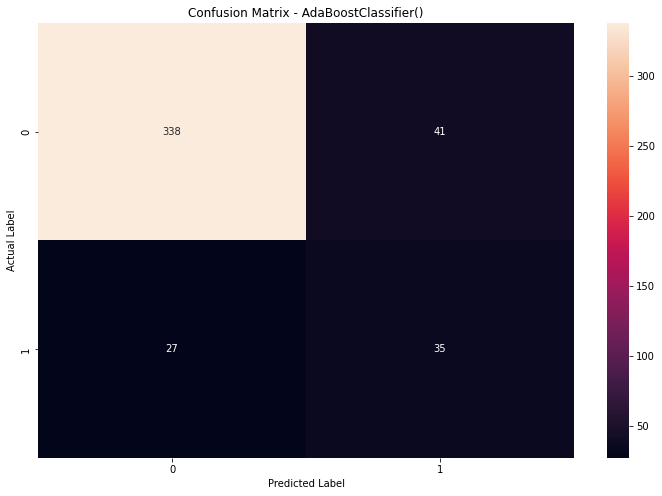

In [37]:
predict(adaboost)

Accuracy: 87.07%
Precision: 55.81%
Recall: 38.71%
F1_Score: 45.71%


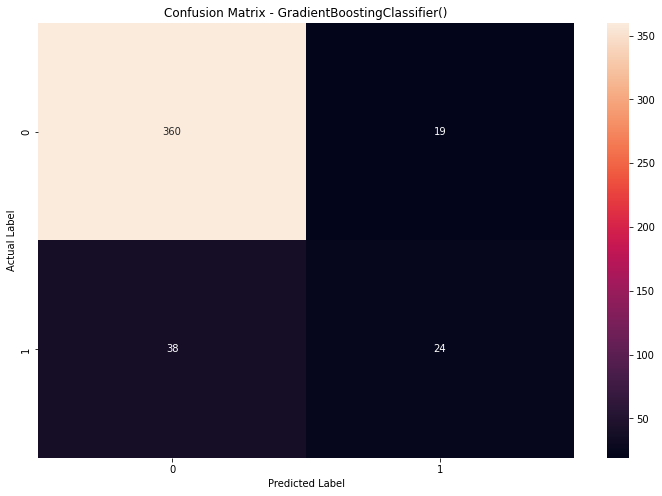

In [38]:
predict(gradientboosting)

#### XGBoost

Accuracy: 86.62%
Precision: 53.49%
Recall: 37.10%
F1_Score: 43.81%


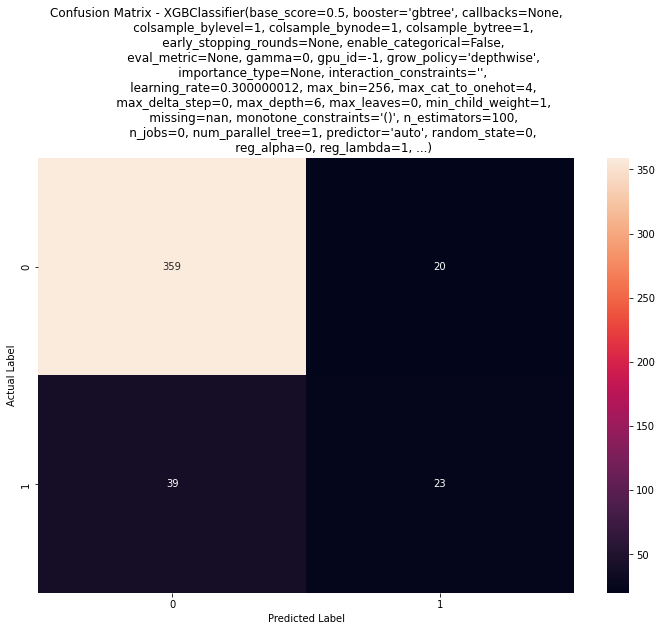

In [39]:
predict(xgboost)

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
# Tunning Random Forest
randomforest_grid = {'n_estimators' : [100,150,200,250,300,350,400,450,500],
                    'max_depth':[5,1,15,20,25,30,40,50],
                    'criterion': ['gini','entropy'],
                    'min_samples_leaf':[2,5,8,10],
                    'min_samples_split': [2,5,8,10],
                    'max_features':['auto','sqrt']}
rf_tuning = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf_tuning,param_distributions = randomforest_grid,
                              cv = 10, n_iter = 10, n_jobs = 1, verbose = 1, scoring = 'recall')
rf_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 1, 15, 20, 25, 30, 40,
                                                      50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   scoring='recall', verbose=1)

In [42]:
rf_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25,
 'criterion': 'entropy'}

Accuracy: 85.26%
Precision: 46.15%
Recall: 29.03%
F1_Score: 35.64%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

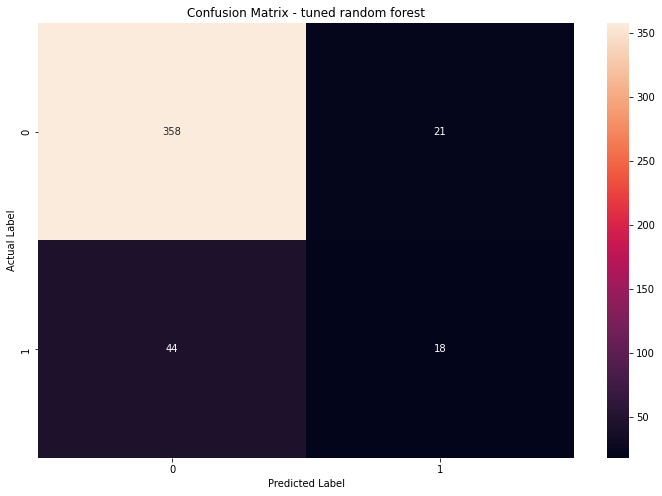

In [43]:
tuned_rf = RandomForestClassifier(**rf_search.best_params_)
tuned_rf.fit(X_train,y_train)
y_pred = tuned_rf.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned random forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [44]:
# Tuning Ada Boost
grid = {'n_estimators' : [50,100,500,1500,2000],
       'learning_rate' : [0.05,0.1,1.0,0.15,0.2,1.5,2.0],
       'algorithm': ['SAMME', 'SAMME.R']}

adaboost = RandomizedSearchCV(AdaBoostClassifier(),
                             param_distributions = grid,
                             cv = 10,
                             n_iter = 10,
                              n_jobs = 1, 
                              verbose = 1, 
                              scoring = 'recall')
adaboost.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.05, 0.1, 1.0, 0.15,
                                                          0.2, 1.5, 2.0],
                                        'n_estimators': [50, 100, 500, 1500,
                                                         2000]},
                   scoring='recall', verbose=1)

In [45]:
adaboost.best_params_

{'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME'}

Accuracy: 82.54%
Precision: 41.18%
Recall: 56.45%
F1_Score: 47.62%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

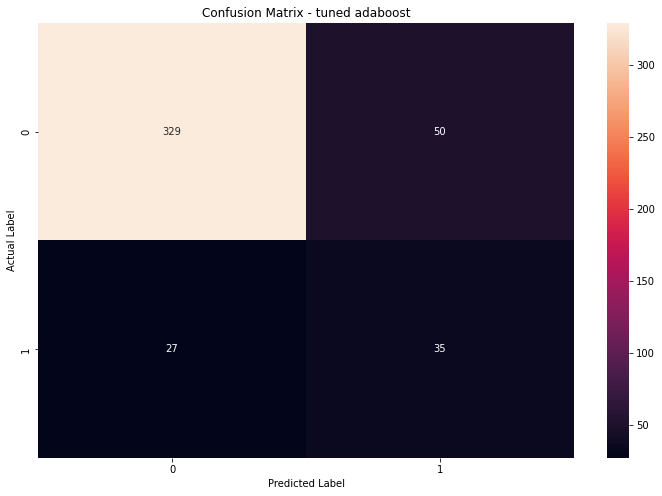

In [46]:
tuned_adaboost = AdaBoostClassifier(**adaboost.best_params_)
tuned_adaboost.fit(X_train,y_train)
y_pred = tuned_adaboost.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned adaboost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [47]:
# Tuning Gradient Boosting
grid2 = {'n_estimators':[500,1000,1500,2000,2500],
        'learning_rate':[0.01,0.05,0.2,0.1,0.15,0.3,0.5],
        'min_samples_split':[2,5,6,10],
        'min_samples_leaf':[3,5,8,12],
        'criterion': ['friedman_mse', 'squared_error', 'mse'],
        'subsample': [0.1,0.2,0.5,0.6,0.8,1.0]}

gradientboosting = RandomizedSearchCV(GradientBoostingClassifier(),
                             param_distributions = grid2,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
gradientboosting.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'learning_rate': [0.01, 0.05, 0.2, 0.1,
                                                          0.15, 0.3, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 12],
                                        'min_samples_split': [2, 5, 6, 10],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500],
                                        'subsample': [0.1, 0.2, 0.5, 0.6, 0.8,
                                                      1.0]},
                   scoring='recall', verbose=1)

In [48]:
gradientboosting.best_params_

{'subsample': 0.6,
 'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

Accuracy: 88.66%
Precision: 66.67%
Recall: 38.71%
F1_Score: 48.98%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

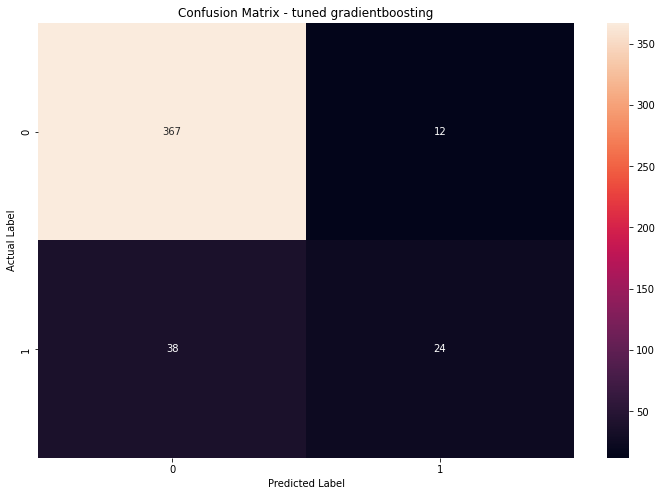

In [49]:
tuned_gradientboosting = GradientBoostingClassifier(**gradientboosting.best_params_)
tuned_gradientboosting.fit(X_train,y_train)
y_pred = tuned_gradientboosting.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned gradientboosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [50]:
# Tuning XGBoost Classifier
grid3 = {'n_estimators': [100,150,200,250,300,350,400,450,500],
              'learning_rate': [0.01, 0.5,0.2, 1.0],
              'subsample': [0.3,0.5, 0.6,0.8,1.0],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.2,0.5, 0.4,0.8,1.0],
              'min_child_weight': [1, 2, 3, 4]}
xgb = RandomizedSearchCV(XGBClassifier(),
                             param_distributions = grid3,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
xgb.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           num_parallel_tree=None,
                                           predictor=None, random_state

In [51]:
xgb.best_params_

{'subsample': 0.6,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.2,
 'colsample_bytree': 0.5}

Accuracy: 86.39%
Precision: 52.78%
Recall: 30.65%
F1_Score: 38.78%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

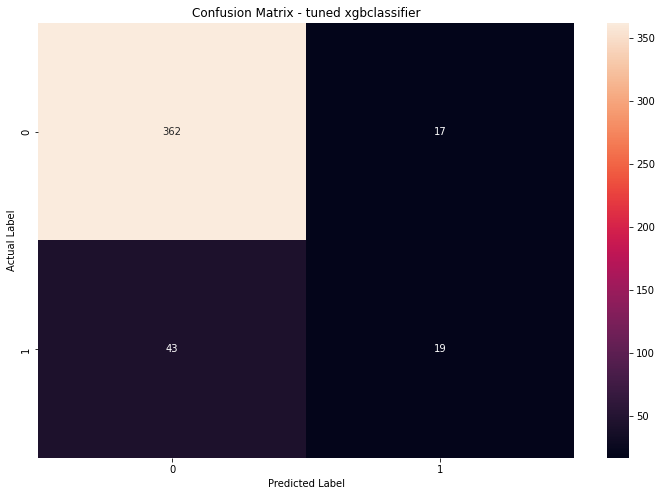

In [52]:
tuned_xgb = XGBClassifier(**xgb.best_params_)
tuned_xgb.fit(X_train,y_train)
y_pred = tuned_xgb.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned xgbclassifier')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])